## 1. Introduction

As our code in main is written for the synthetic data and have done meta-permuation instead of original permutation We are going to give tutorial for how to do a original permutation.  

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('pwd'))))))

## 2. Get dataset
Get dataset with OTU counts or Normalized-OTU counts(We've used TSS normalization) for various taxa level(in this case, we've used phylum level )

In [4]:
import copy
import numpy as np
import math
## an implementation for TSS normalization 
def datatransformation(w1):
    w2=copy.deepcopy(w1)
    n,d=np.shape(w2)
    if n==1:
         for j in range(d):
            if w2[0][j]==0:
                w2[0][j]=0
            else:
                w2[0][j]=math.log2(w2[0][j])
    else:
        for i in range(n):
            for j in range(d):
                if w2[i][j]==0:
                    w2[i][j]=0
                else:
                    w2[i][j]=math.log2(w2[i][j])
    return w2

In [8]:
gc = pd.read_excel(xls, 'Genus Count') 

In [12]:
gc
df1=gc.drop(gc.columns[61:],axis=1)
n=df1.shape[1]
df1.columns= [i for i in range(n)]
x=[i%3 +1 for i in range(n) ]
t=['week']
for i in range(len(x)-1):
    t.append(x[i])
## add week row 
df1.loc[702]=t
df1=df1.drop(df1.index[5])
df1=df1.transpose()
df1= df1.rename(columns=df1.iloc[0])
df1=df1.drop(df1.index[0])

In [13]:
df1

,NaN,Genus,Bacteroides,Prevotella,Parabacteroides,Sutterella,Lachnospiracea_incertae_sedis,Escherichia/Shigella,Parasutterella,Roseburia,...,Caldisericum,Aquisalimonas,Pluralibacter,Enterorhabdus,Flammeovirga,Marichromatium,Gp14,Alkanibacter,NaN,week
1,name1,53BR280013,66755,180,1955,9231,4510,7730,2930,25,...,0,0,0,0,0,0,0,0,115844,1
2,name1,53BR280033,53295,984,10043,1279,7674,2017,5,3536,...,0,0,1,0,0,0,0,0,117038,2
3,name1,53BR280053,36247,61,17643,1330,5246,2192,4,6,...,0,1,0,0,0,0,0,0,81880,3
4,name2,53BR280014,38610,48379,4110,2005,355,278,3547,2745,...,0,0,1,0,0,0,0,0,113997,1
5,name2,53BR280034,33766,784,8126,3846,196,357,58,208,...,0,0,0,0,0,1,0,0,78872,2
6,name2,53BR280054,37542,285,11192,2916,633,3818,17,595,...,0,2,0,1,0,0,0,0,116314,3
7,name3,53BR280018,8989,84394,1555,1012,2282,35,9639,1305,...,0,0,0,0,0,0,0,0,120814,1
8,name3,53BR280038,8659,35267,1005,4430,7453,55,1607,1443,...,0,0,0,0,0,0,0,0,81357,2
9,name3,53BR280058,12932,70193,1890,7867,2539,147,703,1564,...,0,1,0,0,0,0,1,0,121487,3
10,name4,53BR280015,74131,170,8718,3908,6425,3029,36,2138,...,0,0,0,0,0,2,0,0,116928,1


In [27]:
df_week1=df1[df1['week']==1]
#df_week1=df_week1[vacteriainfo]
#df_week1 = df_week1.drop(['candidate_division_WPSUnclassified1', 'candidate_division_WPSUnclassified2'], axis=1)
#print(df_week1.columns)
## week 2 data
df_week2=df1[df1['week']==3]
#df_week2=df_week2[vacteriainfo]
probdata1=df_week1.transpose().to_numpy()
probdata2=df_week2.transpose().to_numpy()

In [28]:
df_week1
# drop first two column
dropcol=df_week1.columns[0:2]
df_week1=df_week1.drop(dropcol,axis=1)
df_week2=df_week2.drop(dropcol,axis=1)


In [29]:
total=pd.concat([df_week1,df_week2],axis=0)

In [30]:
total.to_csv('total.csv',index=False)   

In [5]:
import pandas as pd
import copy

xls = pd.ExcelFile('16A13800.xlsx')
xls2=pd.ExcelFile('3687A580.xlsx')
df = pd.read_excel(xls, 'Phylum%') ## in our case the data is given with percentile

feat = pd.read_excel(xls2, 'phylumabsenceratio') ## gets the absence ration that is priorly known, make it over than 1 if not known, and if it is not known, use data's absence ratio for estimation.  
feat_info=((feat['Unnamed: 1']).to_numpy())


df1=df.drop(df.columns[61:],axis=1)
n=df1.shape[1]
df1.columns= [i for i in range(n)]
x=[i%3 +1 for i in range(n) ]
t=['week']
for i in range(len(x)-1):
    t.append(x[i])
## add week row 
df1.loc[702]=t
df1=df1.drop(df1.index[5])
df1=df1.transpose()
df1= df1.rename(columns=df1.iloc[0])
df1=df1.drop(df1.index[0])
vacteriainfo=df1.columns[5:50]
# print(vacteriainfo)
vacdf=df1[vacteriainfo]

vacdf.index.name='prob'


In [7]:
df

,Unnamed: 0,1,2,3,1.1,2.1,3.1,1.2,2.2,3.2,...,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,NaN,name1,name1,name1,name2,name2,name2,name3,name3,name3,...,NaN,NaN,NaN,파스퇴르,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,53BR280013,53BR280033,53BR280053,53BR280014,53BR280034,53BR280054,53BR280018,53BR280038,53BR280058,...,평균 증감,비율 가중치,NaN,1차,2차,3차,1-2차변화,2-3차변화,평균 증감,비율 가중치
2,신장,159.3,159.3,159.3,154,154,154,161,161,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,체중,57.5,57.7,56.1,48,48.4,48.2,57.2,59.6,59.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,우유,서울,서울,서울,서울,서울,서울,서울,서울,서울,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,서울1,서울2,서울3,서울1,서울2,서울3,서울1,서울2,서울3,...,평균 증감,가중 증감,NaN,1차,2차,3차,1-2차변화,2-3차변화,평균 증감,가중 증감
6,Bacteroidetes,0.656078,0.547287,0.656224,0.783423,0.683587,0.450091,0.797557,0.566757,0.711435,...,-0.074452,-0.050862,NaN,0.638138,0.607429,0.626327,-0.048122,0.031112,-0.008505,-0.005427
7,Firmicutes,0.283031,0.402344,0.276104,0.172671,0.21332,0.383426,0.179582,0.343358,0.194058,...,0.18468,0.04286,NaN,0.267205,0.282604,0.260065,0.057631,-0.079755,-0.011062,-0.002956
8,Proteobacteria,0.056961,0.047626,0.063488,0.042287,0.096019,0.067377,0.017582,0.078285,0.075439,...,0.109967,0.008148,NaN,0.078713,0.095748,0.087479,0.216417,-0.086358,0.065029,0.005119
9,Actinobacteria,0.002789,0.002311,0.003593,0.001275,0.006133,0.097234,0.000669,0.001026,0.001805,...,0.446783,0.004137,NaN,0.006705,0.011082,0.016551,0.65289,0.493503,0.573197,0.003843


In [31]:
df_week1
# s

,Bacteroides,Prevotella,Parabacteroides,Sutterella,Lachnospiracea_incertae_sedis,Escherichia/Shigella,Parasutterella,Roseburia,Veillonella,Alistipes,...,Glaciecola,Caldisericum,Aquisalimonas,Pluralibacter,Enterorhabdus,Flammeovirga,Marichromatium,Gp14,Alkanibacter,week
1,66755,180,1955,9231,4510,7730,2930,25,34,3378,...,0,0,0,0,0,0,0,0,0,1
4,38610,48379,4110,2005,355,278,3547,2745,863,1414,...,0,0,0,1,0,0,0,0,0,1
7,8989,84394,1555,1012,2282,35,9639,1305,2013,636,...,0,0,0,0,0,0,0,0,0,1
10,74131,170,8718,3908,6425,3029,36,2138,72,825,...,0,0,0,0,0,0,2,0,0,1
13,26686,34620,8994,3947,560,24,760,1889,10791,940,...,0,0,0,0,0,0,0,0,0,1
16,67790,101,6184,3471,2192,279,673,2644,3185,5068,...,0,1,0,0,0,0,0,0,0,1
19,50721,152,2912,1006,10691,650,1399,12744,3135,2371,...,1,0,0,0,0,0,0,1,1,1
22,82115,196,5874,7405,6796,644,7,153,443,1631,...,0,0,0,0,0,0,0,0,0,1
25,32099,80,7915,2194,5726,577,75,15688,3490,382,...,2,0,1,0,0,1,0,0,0,1
28,58826,55,28,4138,777,41,371,2506,14366,134,...,1,0,0,0,0,0,0,0,0,1


## 3. Do Permuation 
you can set various hyperparameters for choosing. 

In [7]:
import argparse
parser = argparse.ArgumentParser(description='Args Sparse Simulation')
parser.add_argument('--p_num', type=int, default=10, help='num ber of permutation')
parser.add_argument('--x_grid_start',type=int, default=1,help='start of the x-axis')
parser.add_argument('--x_grid_end',type=int, default=20,help='end of the x-axis')
parser.add_argument('--same_ratio',type=int, default=90,help='Difference ratio for each group') ## only can choose 50,90, 100
parser.add_argument('--interval',type=float,default=0.1,help='interval for x-axis' )
parser.add_argument('--epsilon',type=float,default=0.0001,help='to_avoid zero division')
args, _ = parser.parse_known_args()

  0%|          | 0/10 [00:00<?, ?it/s]

Distance of Original Data :0.36117891669808716


Distance for iteration1 19.750089794775825


Distance for iteration2 16.361361365124402


Distance for iteration3 0.07304772183317129


Distance for iteration4 0.2713155853717355


Distance for iteration5 0.14184758843862466


Distance for iteration6 0.07764587281972757


Distance for iteration7 0.08179984969314369


Distance for iteration8 0.25734053423420816


Distance for iteration9 1.4344787605019054


 10%|█         | 1/10 [00:50<07:38, 50.98s/it]

Distance for iteration10 0.013093830068042604
Distance of Original Data :0.36117891669808716


Distance for iteration1 0.10412781094689981


Distance for iteration2 0.02172259341630265


Distance for iteration3 0.20796929514884163


Distance for iteration4 0.058940935109233504


Distance for iteration5 0.3602752423427151


Distance for iteration6 18.703785356625495


Distance for iteration7 0.6422213005143201


Distance for iteration8 13.186399536006967


Distance for iteration9 0.045950498007407144


 20%|██        | 2/10 [01:40<06:39, 49.99s/it]

Distance for iteration10 0.11175197066390773
Distance of Original Data :0.44636825767219024


Distance for iteration1 1.3039438338240474


Distance for iteration2 0.07082364008159801


Distance for iteration3 17.043596717478202


Distance for iteration4 0.11564238675155464


Distance for iteration5 0.17399790221339292


Distance for iteration6 0.06955356871400924


Distance for iteration7 3.1451214989795524


Distance for iteration8 0.05132856597572222


Distance for iteration9 0.08110932792224973


 30%|███       | 3/10 [02:30<05:51, 50.24s/it]

Distance for iteration10 0.023118789115481847
Distance of Original Data :0.29019551985346875


Distance for iteration1 0.014341884720948165


Distance for iteration2 0.10500839981292062


Distance for iteration3 8.497610018606283


Distance for iteration4 0.08933349307508236


Distance for iteration5 0.018367180810278563


Distance for iteration6 0.5568539168577746


Distance for iteration7 0.21325744158967563


Distance for iteration8 0.2242583582482315


Distance for iteration9 0.019055760609300552


 40%|████      | 4/10 [03:21<05:02, 50.37s/it]

Distance for iteration10 0.011701154033036315
Distance of Original Data :0.36117891669808716


Distance for iteration1 0.1119391999149545


Distance for iteration2 0.09227979399805883


Distance for iteration3 0.3649718312662312


Distance for iteration4 0.16910013528175433


Distance for iteration5 0.260217505474629


Distance for iteration6 1.559885514783823


Distance for iteration7 0.024964631588701595


Distance for iteration8 0.10826121908302752


Distance for iteration9 2.7752367189398672


 50%|█████     | 5/10 [04:12<04:12, 50.53s/it]

Distance for iteration10 0.012417170764564622
Distance of Original Data :0.426828756604192


Distance for iteration1 0.1412879236075452


Distance for iteration2 0.36418449780915785


Distance for iteration3 0.035473901670096154


Distance for iteration4 0.44621565178469935


Distance for iteration5 0.3881960897202485


Distance for iteration6 0.20198692629774076


Distance for iteration7 0.047680971904166924


Distance for iteration8 5.14289837841053


Distance for iteration9 0.055266877632166284


 60%|██████    | 6/10 [05:03<03:23, 50.93s/it]

Distance for iteration10 0.0209814733417378
Distance of Original Data :0.29019551985346875


Distance for iteration1 0.100074443043147


Distance for iteration2 0.005625933853315883


Distance for iteration3 0.030563960730816866


Distance for iteration4 0.7734226894368343


Distance for iteration5 0.767007825962344


Distance for iteration6 1.2953539988674887


Distance for iteration7 15.50317987673619


Distance for iteration8 0.6298315074748435


Distance for iteration9 0.116794222197308


 70%|███████   | 7/10 [05:52<02:30, 50.09s/it]

Distance for iteration10 17.23605330231647
Distance of Original Data :0.36117891669808716


Distance for iteration1 0.04462787500800579


Distance for iteration2 0.12776909443031478


Distance for iteration3 1.010194249361198


Distance for iteration4 0.005646451654699892


Distance for iteration5 0.7651022651296581


Distance for iteration6 0.5155323448377105


Distance for iteration7 0.30518491529100117


Distance for iteration8 0.019594847058113103


Distance for iteration9 3.1134426759679936


 80%|████████  | 8/10 [06:40<01:38, 49.42s/it]

Distance for iteration10 0.1999702400375436
Distance of Original Data :0.23246294034701065


Distance for iteration1 0.21073080465794486


Distance for iteration2 0.07674064921585888


Distance for iteration3 0.014913113033560983


Distance for iteration4 2.754377823391449


Distance for iteration5 0.6882737007628009


Distance for iteration6 4.380966655072626


Distance for iteration7 0.039777122439171544


Distance for iteration8 0.03500207249860077


Distance for iteration9 0.05307283230314827


 90%|█████████ | 9/10 [07:28<00:48, 48.96s/it]

Distance for iteration10 4.421745411896216
Distance of Original Data :0.4836905354570366


Distance for iteration1 2.6730626681881358


Distance for iteration2 0.6437633641802419


Distance for iteration3 0.03235515809101104


Distance for iteration4 0.026439888475260923


Distance for iteration5 0.14815040997065373


Distance for iteration6 0.2722659312937983


Distance for iteration7 0.18427279751583947


Distance for iteration8 0.13056578508658917


Distance for iteration9 0.02728123646767964


100%|██████████| 10/10 [08:16<00:00, 49.62s/it]

Distance for iteration10 0.21714949192552796
$p$-value for feature 1 is 0.3
$p$-value for feature 2 is 0.3
$p$-value for feature 3 is 0.3
$p$-value for feature 4 is 0.2
$p$-value for feature 5 is 0.3
$p$-value for feature 6 is 0.2
$p$-value for feature 7 is 0.6
$p$-value for feature 8 is 0.4
$p$-value for feature 9 is 0.4
$p$-value for feature 10 is 0.2


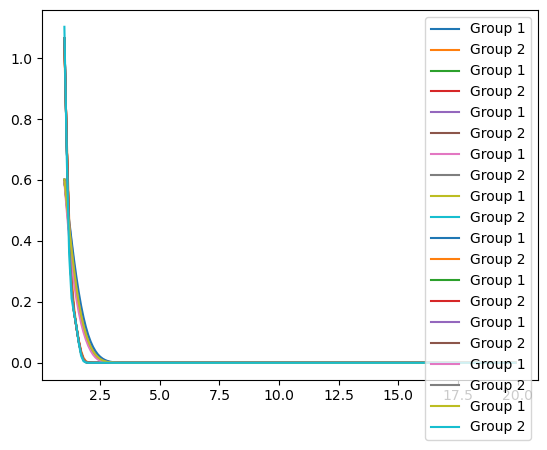

In [8]:
import math
import numpy as np
import matplotlib.pylab as plt
from src.Util import Permutator
import time
from tqdm import tqdm
## week 1 data
df_week1=df1[df1['week']==1]
df_week1=df_week1[vacteriainfo]
#df_week1 = df_week1.drop(['candidate_division_WPSUnclassified1', 'candidate_division_WPSUnclassified2'], axis=1)
#print(df_week1.columns)
## week 2 data
df_week2=df1[df1['week']==2]
df_week2=df_week2[vacteriainfo]
probdata1=df_week1.transpose().to_numpy()
probdata2=df_week2.transpose().to_numpy()
probdata1=probdata1.astype(np.float32)
probdata2=probdata2.astype(np.float32)
probdata1=datatransformation(probdata1)
probdata2=datatransformation(probdata2)
feat_info=np.zeros(12)

w1=np.negative(probdata1)
w2=np.negative(probdata2)
#print((w1))

pvals=[]
for i in tqdm(range(10)):
    p=Permutator(w1[0,:].reshape(1,20),w2[0,:].reshape(1,20), np.array([feat_info[i]]),args )
    pvals.append(p.permutation())
import sys

#sys.stdout = open('result.txt', 'w')

for i in range(10):
    print("$p$-value for feature {} is {}".format(i+1,pvals[i]))

#sys.stdout.close()